In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import random

# Task 2 - Global optimal Portfolio

## Exploring the data and preprocessing

In [60]:
mc_df = pd.read_csv('Data/MarketCapDF.csv', index_col=0, parse_dates=True)
ew_df = pd.read_csv('Data/EqualWeightDF.csv', index_col=0, parse_dates=True)
mc_df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07-01,0.56,-0.07,NaN,-1.39,0.00,-1.44,0.62,-1.27,-0.90,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1926-07-02,0.29,0.06,NaN,0.78,0.70,1.46,0.03,0.00,-0.34,-0.35,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
1926-07-06,-0.33,0.18,NaN,-1.74,0.50,-0.96,-0.06,4.27,-1.20,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
1926-07-07,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
1926-07-08,0.30,1.12,NaN,-0.15,0.30,-0.49,0.24,0.00,-0.01,0.79,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [61]:
print(ew_df.shape)
ew_df.head()

(24099, 48)


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07-01,0.63,-0.28,NaN,-0.74,-0.04,-1.44,0.57,-1.27,-0.59,-0.37,...,-0.25,0.32,1.50,-0.13,-0.22,2.26,0.54,1.46,-0.14,-0.75
1926-07-02,1.03,0.11,NaN,0.09,0.40,1.46,0.18,0.00,0.17,-0.26,...,0.25,-0.52,0.00,-0.06,-0.86,0.94,-0.19,2.10,0.12,2.47
1926-07-06,-1.26,-0.12,NaN,-0.25,0.63,-0.96,0.09,4.27,-0.28,0.25,...,0.95,0.22,0.42,0.17,-0.28,0.25,0.69,-0.41,-0.02,0.66
1926-07-07,1.55,-0.43,NaN,-2.02,-0.76,-0.49,0.11,-4.10,-0.06,-0.33,...,1.05,-0.14,-7.24,-0.41,-0.72,-0.84,0.13,-2.24,-1.24,0.41
1926-07-08,0.95,1.01,NaN,-0.08,1.00,-0.49,-0.01,0.00,0.18,-0.26,...,-0.48,0.16,2.56,-0.29,-0.04,0.74,-0.83,-0.21,-0.96,-0.60


Choosing the market cap weighted dataframe

In [62]:
# count number of missing values per column, flag any 
print(f'Number of missing values per column:\n{mc_df.isnull().sum()}')

# check for any duplicate rows
print(f'\nNumber of duplicated rows: {mc_df.duplicated().sum()}')
print(f'Index of duplicated row: {mc_df[mc_df.duplicated()].index}')
print(f'Number of duplicated columns: {mc_df.T.duplicated().sum()}')
print(f'Number of missing values in dataframe:\n{mc_df.isnull().sum().sum()}')

Number of missing values per column:
Agric        0
Food         0
Soda     10420
Beer         0
Smoke        0
Toys         0
Fun          0
Books        0
Hshld        0
Clths        0
Hlth     11903
MedEq        0
Drugs        0
Chems        0
Rubbr     1487
Txtls        0
BldMt        0
Cnstr        0
Steel        0
FabPr    10420
Mach         0
ElcEq        0
Autos        0
Aero         0
Ships        0
Guns     10420
Gold     10420
Mines        0
Coal         0
Oil          0
Util         0
Telcm        0
PerSv      299
BusSv        0
Comps        0
Chips        0
LabEq        0
Paper     1096
Boxes        0
Trans        0
Whlsl        0
Rtail        0
Meals        0
Banks        0
Insur        0
RlEst        0
Fin          0
Other        0
dtype: int64

Number of duplicated rows: 0
Index of duplicated row: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Number of duplicated columns: 0
Number of missing values in dataframe:
56465


## 1. Compute the optimal portfolio for different lengths of training time series and discuss what you observe.

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
x_1 = mc_df.iloc[:int(len(mc_df)*0.2)]
x_2 = mc_df.iloc[:int(len(ew_df)*0.4)]
x_3 = mc_df.iloc[:int(len(mc_df)*0.6)]
x_4 = mc_df.iloc[:int(len(mc_df)*0.8)]

In [65]:
x_1.dropna(how='any', axis=1, inplace=True)
x_2.dropna(how='any', axis=1, inplace=True)
x_3.dropna(how='any', axis=1, inplace=True)
x_4.dropna(how='any', axis=1, inplace=True)

In [66]:
x_1.fillna(0, inplace=True)
x_2.fillna(0, inplace=True)
x_3.fillna(0, inplace=True)
x_4.fillna(0, inplace=True)
x_1.shape, x_2.shape, x_3.shape, x_4.shape

((4819, 40), (9639, 40), (14459, 40), (19279, 40))

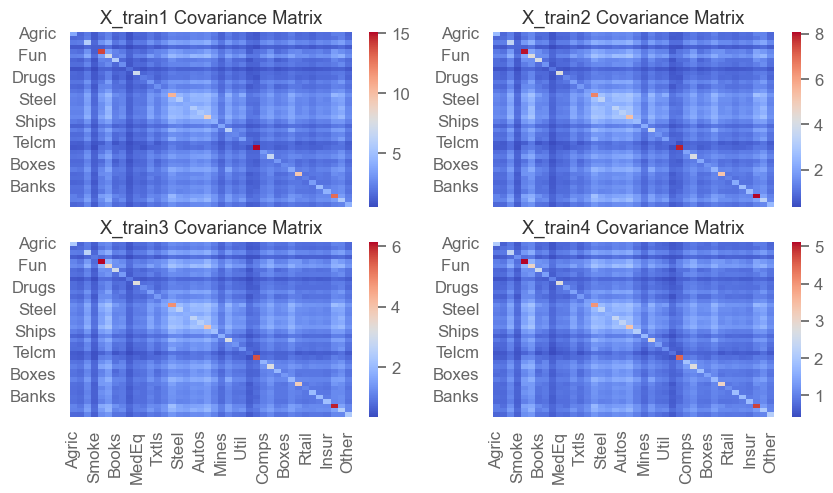

In [67]:
X_dfs = [x_1, x_2, x_3, x_4]

# plot covariance matrix
fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
for i, ax in enumerate(ax.flatten()):
    sns.heatmap(X_dfs[i].cov(), ax=ax, cmap='coolwarm', annot=False, cbar=True)
    ax.set_title(f'X_train{i+1} Covariance Matrix')
plt.show()

In [68]:
X = mc_df.copy()
X = X.fillna(0)
X.shape

(24099, 48)

### Error for different values of N (lengths of time series)

In [70]:
CReal = X.iloc[int(len(X)*0.97):].cov().to_numpy()
xTrain = np.random.multivariate_normal(np.zeros(len(CReal)), CReal, 100)
C = np.cov(xTrain, rowvar=False)
invC = np.linalg.inv(C) 

In [71]:
invC.shape

(48, 48)

In [72]:
z = np.sum(np.sum(invC))
w = (np.sum(invC, axis=1)/z).T

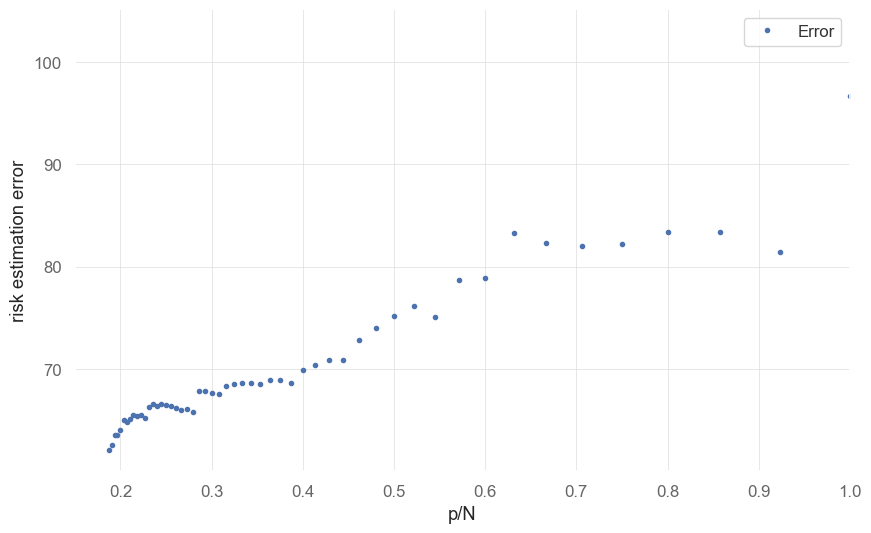

In [74]:
X_train = X.iloc[:int(len(X)*0.8)].to_numpy()
X_test = X.iloc[int(len(X)*0.8):].to_numpy()
p = X.shape[1]
RES = []
r = []
lambda_ = 1.0
for i in range(100):
    res = []
    for N in range(256,40-1,-4):       
        xTrain = X_train[:N,:]
        C = np.cov(xTrain, rowvar=False)
        invC = np.linalg.inv(C + lambda_ * np.eye(p))
        z = np.sum(np.sum(invC))
        w = (np.sum(invC, axis=1)/z).T

        xTest = X_test[:N,:]
        CTest = np.cov(X_test, rowvar=False)
        volTrain = w.T @ C @ w
        volTest = w.T @ CTest @ w
        res.append(volTest/volTrain-1)
        if i==0:
            r.append(p/N)

    RES.append(res)

plt.plot(r,np.mean(RES, axis=0),'.', label='Error')
plt.xlabel('p/N')
plt.xlim(0.15,1)
plt.ylabel('risk estimation error')
plt.legend(loc=0)
plt.savefig('Photos/Task2/error_pn.png', dpi=600)

**Reducing length of TS will lead to overfitting so make sure its better fit if do this**


In [29]:
def regularization_with_grad_descent(y, X, alpha, tol, lambda_, switch='ridge', max_iter=1000, gamma=None):

    N=X.shape[0]
    p=X.shape[1]
    beta =np.zeros(p)
    err = 1.0
    iterations = 1
    while np.all(err) > tol and iterations < max_iter:
        if switch == 'ridge':
            J=(X @ beta-y).T @ (X @ beta-y) + lambda_ * np.dot(beta.T, beta) #objective function
            gradient = 2 * (np.dot((np.dot(X, beta) - y).T, X).T) + 2 * lambda_ * beta # gradient of J for ridge
            beta = beta -alpha/N*gradient # taking a step along the gradient
            err = np.abs(J - np.dot((np.dot(X, beta) - y).T, (np.dot(X, beta) - y)) - lambda_ * np.dot(beta.T, beta))  #computing the change in J
        elif switch == 'lasso': 
            J=(X*beta-y).T @ (X*beta-y) + lambda_ * abs(beta)
            gradient = 2*((X * beta-y).T @ X).T + lambda_ 
            beta = beta -alpha/N*gradient # taking a step along the gradient
            err = abs(J-(X @ beta-y).T @ (X @ beta-y) - lambda_ * abs(beta)) #computing the change in J
        elif switch == 'elastic net': 
            J=(X*beta-y).T @ (X*beta-y) + lambda_*(gamma * abs(beta)+ (1-gamma)/2 *beta.T @ beta) # gamma = linear combo of L1 and L2
            gradient = 2*((X * beta-y).T @ X).T + lambda_ * (gamma + (1-gamma)*beta)
            beta = beta -alpha/N*gradient # taking a step along the gradient
            err = abs(J-(X @ beta-y).T @ (X @ beta-y) - + lambda_ * (gamma + (1-gamma)*beta)) #computing the change in J

        iterations += 1
    
    return beta, iterations

Ridge vs unregularised:

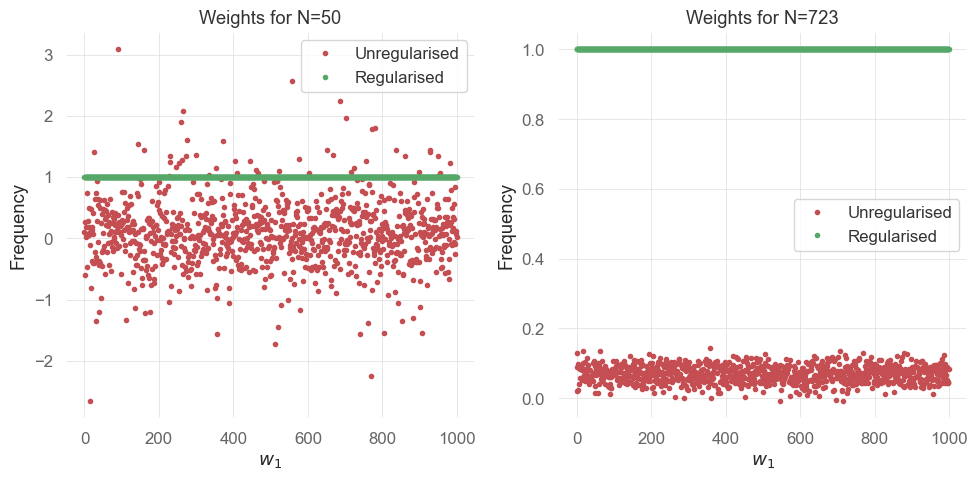

In [73]:
# Sample fluctuations of weights: unregularized vs regularized
p = 48
N = [50, X.iloc[int(len(X)*0.97):].shape[0]]
CReal = X.iloc[int(len(X)*0.97):].cov().to_numpy()
invC = np.linalg.inv(CReal)
z = np.sum(np.sum(invC))
w = (np.sum(invC, axis=1)/z).T

# w1Real = w[0]
lambda_ = 10
fig, ax = plt.subplots(1,2, figsize=(10,5))
for j, n in enumerate(N):
     w1Regularized = []
     w1Unregularized = []
     for i in range(1000):
          xTrain = np.random.multivariate_normal(np.zeros(p), CReal, n)
          C = np.cov(xTrain, rowvar=False)
          invC = np.linalg.inv(C) 
          z = np.sum(np.sum(invC))
          w = (np.sum(invC, axis=1)/z).T
          w1Unregularized.append(w[0])
          
          invC = np.linalg.inv(C + lambda_ * np.eye(p))
          z = np.sum(np.sum(invC))
          w = (np.sum(invC.T)/z).T
          w1Regularized.append(w)
     
     # add a subplot for each value of N
     ax[j].plot(w1Unregularized,'r.', label='Unregularised')
     ax[j].plot(w1Regularized,'g.', label='Regularised')
     ax[j].set_title(f'Weights for N={n}')
     ax[j].set_xlabel(r'$w_1$')
     ax[j].set_ylabel('Frequency')
     ax[j].legend()
plt.tight_layout()
plt.savefig('Photos/Task2/reg_unreg_weights.png', dpi=600)

## 2. Introduce a regularization scheme, discuss its effect, and use validation methods to find the optimal values of hyperparameters.

### FULL DATASET:

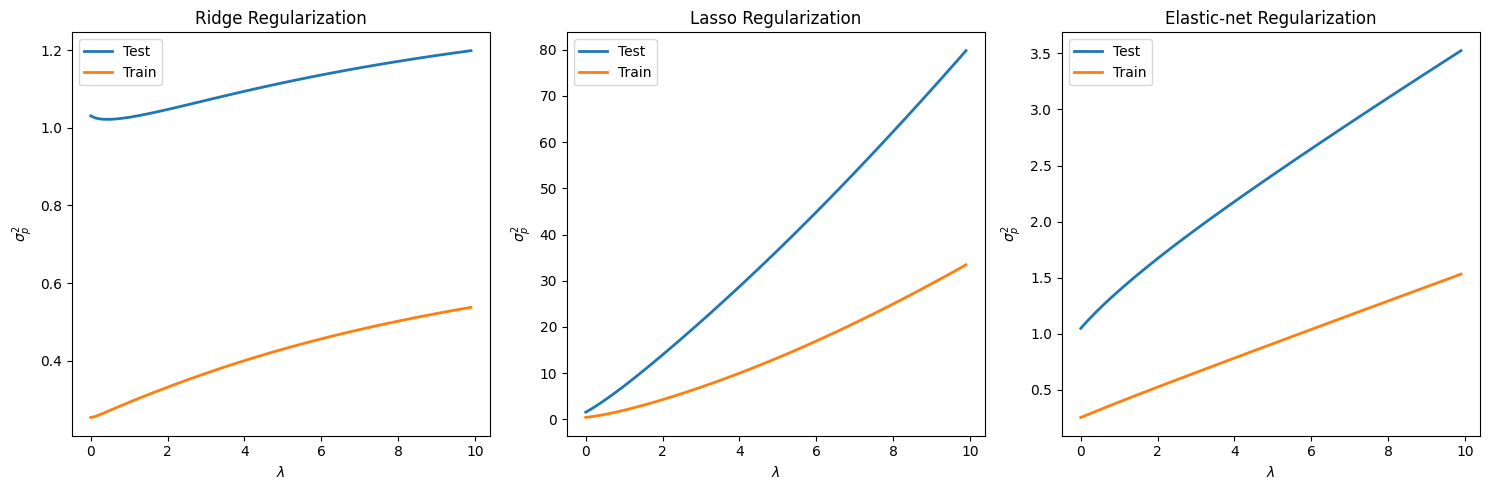

In [32]:
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]
CTrain = X_train.cov().to_numpy()
CTest = X_test.cov().to_numpy()

p=X.shape[1]

lambda_ = np.arange(0,10,0.1)
gamma = 0.1
switches = ['Ridge', 'Lasso', 'Elastic-net']
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i, switch in enumerate(switches):
    vol2Test = []
    vol2Train = []
    L = []
    for l in lambda_:
        if switch == 'Ridge':
            # xTrain = np.random.multivariate_normal(np.zeros(p), CReal, N)
            # C = np.cov(xTrain, rowvar=False)     
            # invC = np.linalg.inv(C + lambda_ * np.eye(p))
            # z = np.sum(np.sum(invC))
            # w = (np.sum(invC.T)/z).T
            invCTrain = np.linalg.inv(CTrain + l * np.eye(p))
            z = np.sum(invCTrain)
            w = np.sum(invCTrain,axis=1)/z
            vol2Train.append(w.T @ CTrain @ w)
            vol2Test.append(w.T @ CTest @ w)
        elif switch == 'Lasso':
            # solver with constraint
            invCTrain = np.linalg.inv(CTrain + l * np.eye(p))
            z = np.sum(np.abs(invCTrain), axis=1) # lasso
            w = np.sum(invCTrain,axis=1)/z #lasso
            vol2Train.append(w.T @ CTrain @ w)
            vol2Test.append(w.T @ CTest @ w)
        elif switch == 'Elastic-net':
            invCTrain = np.linalg.inv(CTrain + l * np.eye(p))

            w_lasso = np.sum(invCTrain, axis=1) / np.sum(np.abs(invCTrain), axis=1)  # L1 regularization (lasso)
            w_ridge = np.sum(invCTrain,axis=1)/np.sum(invCTrain) # L2 regularization (ridge)
            
            w_elastic = gamma * w_lasso + (1 - gamma) * w_ridge # Elastic-net regularization term

            vol2Train.append(w_elastic.T @ CTrain @ w_elastic) 
            vol2Test.append(w_elastic.T @ CTest @ w_elastic)  
            
            # vol2Train.append(w.T @ CTrain @ w + gamma * np.sum(w ** 2))  # Elastic-net regularization term
            # vol2Test.append(w.T @ CTest @ w + gamma * np.sum(w ** 2))  
        
        L.append(l)

    ax[i].plot(L, vol2Test, lw=2, label='Test')
    ax[i].plot(L, vol2Train, lw=2, label='Train')
    ax[i].set_xlabel(r'$\lambda$')
    ax[i].set_ylabel(r'$\sigma^2_p$')
    ax[i].set_title(f'{switch} Regularization')
    ax[i].legend(loc=0)

plt.tight_layout()

cant find minimum as N is so large it doesnt need regularisation

## Finding the optimal hyperparameters for each regularisation method and calculating in and out of sample risk vs equal weight

## Equal-weight benchmark

In [75]:
import numpy as np
from sklearn.linear_model import Ridge
from scipy.optimize import minimize


X_trains = [X.iloc[int(len(X)*0.80):int(len(X)*0.84)], X.iloc[int(len(X)*0.84):int(len(X)*0.88)], X.iloc[int(len(X)*0.88):int(len(X)*0.92)], X.iloc[int(len(X)*0.92):int(len(X)*0.96)]] #2005-10, 2010-2015
X_tests = [X.iloc[int(len(X)*0.84):int(len(X)*0.86)], X.iloc[int(len(X)*0.88):int(len(X)*0.90)], X.iloc[int(len(X)*0.92):int(len(X)*0.94)], X.iloc[int(len(X)*0.96):int(len(X)*0.98)]]

p = X_trains[0].shape[1]
x_test_weights = {}
in_sample_risk = []
out_of_sample_risk = []

for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    equal_weight = np.array(p * [1. / p,])
    in_sample_risk.append(np.std(np.dot(equal_weight, X_train.T)))
    out_of_sample_risk.append(np.std(np.dot(equal_weight, X_test.T)))    
x_test_weights[f'X_test_{i}'] = weights[np.argmin(out_of_sample_risk)]

plt.figure(figsize=(10, 8))    
plt.plot(range(len(in_sample_risk)), in_sample_risk, label='In-sample Risk')
plt.plot(range(len(out_of_sample_risk)), out_of_sample_risk, label='Out-of-sample Risk')
plt.title(f'In and Out of Sample Risk (equal weight portfolio)')
plt.xlabel(r'x_train number')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()

## Ridge Regularisation

Optimal lambda for each X_train: {'X_train_0': 0.0, 'X_train_1': 0.5, 'X_train_2': 0.1}


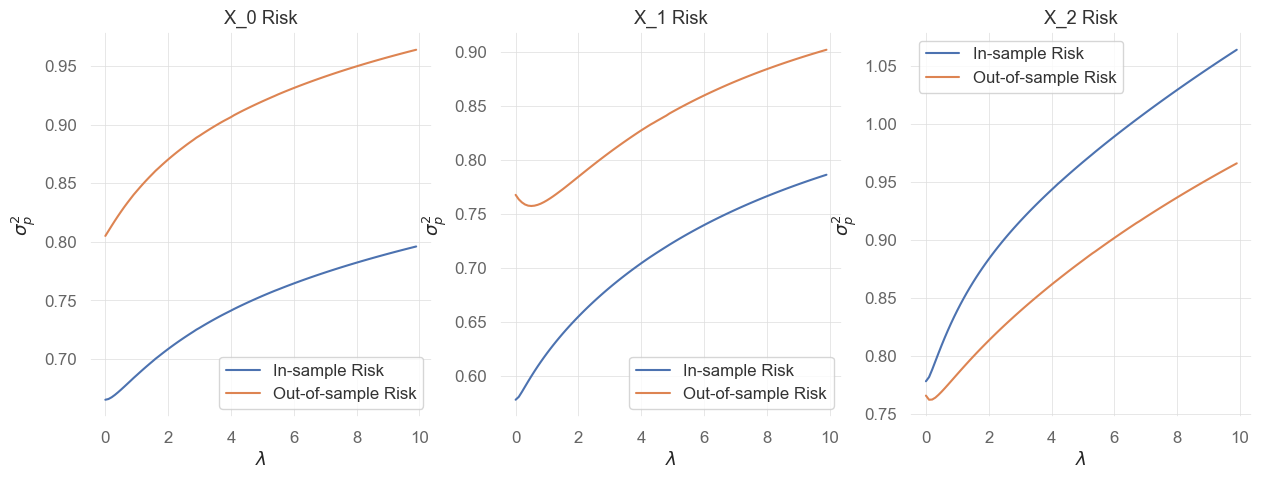

In [125]:
import numpy as np
from scipy.optimize import minimize

def ridge_portfolio_variance(weights, lambda_, p):
    return weights.T @ (cov_matrix + lambda_ * np.eye(p)) @ weights

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

X_trains = [X.iloc[int(len(X)*0.80):int(len(X)*0.84)], X.iloc[int(len(X)*0.84):int(len(X)*0.88)], X.iloc[int(len(X)*0.88):int(len(X)*0.92)]] 
X_tests = [X.iloc[int(len(X)*0.84):int(len(X)*0.86)], X.iloc[int(len(X)*0.88):int(len(X)*0.90)], X.iloc[int(len(X)*0.92):int(len(X)*0.94)]]

p = X_trains[0].shape[1]
lambdas = np.arange(0.1,10,0.1)
min_var_lambdas = {}
x_test_weights = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    cov_matrix = np.cov(X_train, rowvar=False)

    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    for lambda_ in lambdas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(ridge_portfolio_variance, initial_weights, args=(lambda_, p), method='SLSQP', constraints=constraints) # bounds=bounds
        optimal_weights = result.x

        weights.append(optimal_weights)
        # in_sample_risk.append(optimal_weights.T @ cov_matrix @ optimal_weights)
        # out_of_sample_risk.append(optimal_weights.T @ np.cov(X_test, rowvar=False) @ optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights[f'X_test_{i}'] = weights[np.argmin(out_of_sample_risk)]
    min_var_lambdas[f'X_train_{i}'] = lambdas[np.argmin(out_of_sample_risk)]
    
    ax[i].plot(lambdas, in_sample_risk, label='In-sample Risk')
    ax[i].plot(lambdas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[i].set_title(f'X_{i} Risk')
    ax[i].set_xlabel(r'$\lambda$')
    ax[i].set_ylabel(r'$\sigma^2_p$')
    ax[i].legend(loc=0)

print(f'Optimal lambda for each X_train: {min_var_lambdas}')

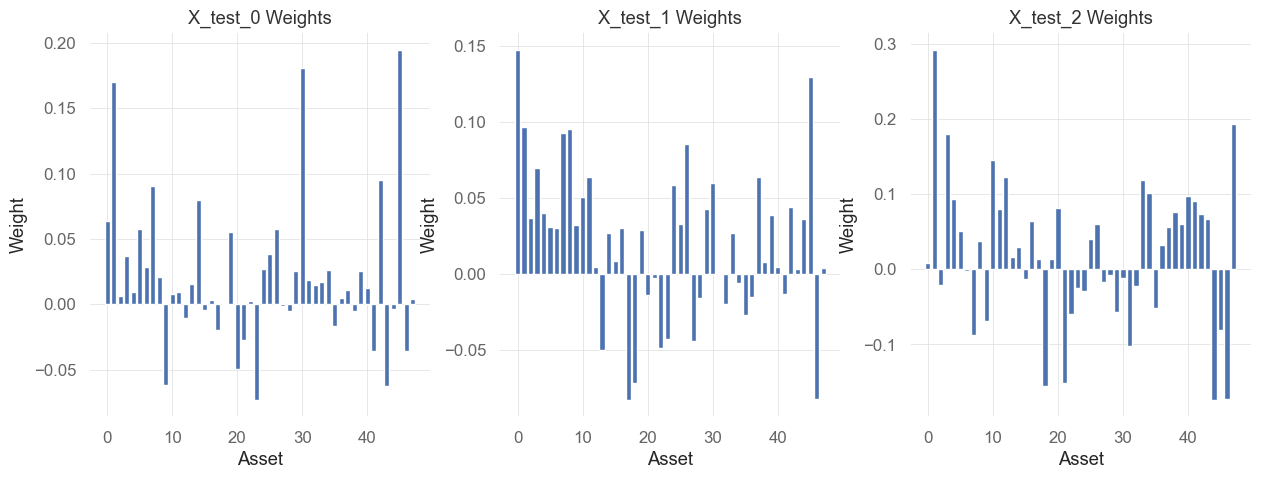

In [126]:
# plot a bar chart of weights for each X_test
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i in range(3):
    ax[i].bar(np.arange(p), x_test_weights[f'X_test_{i}'])
    ax[i].set_title(f'X_test_{i} Weights')
    ax[i].set_xlabel('Asset')
    ax[i].set_ylabel('Weight')

In [127]:
# Taking average of each sample as best regularisation
ridge_lambda_ = np.mean(list(min_var_lambdas.values()))
# ridge_weights = np.mean(list(x_test_weights.values()), axis=0)
ridge_lambda_

0.19999999999999998

## Lasso Regularisation

Optimal lambda for each X_train: {'X_train_0': 0.1, 'X_train_1': 0.1, 'X_train_2': 0.1}


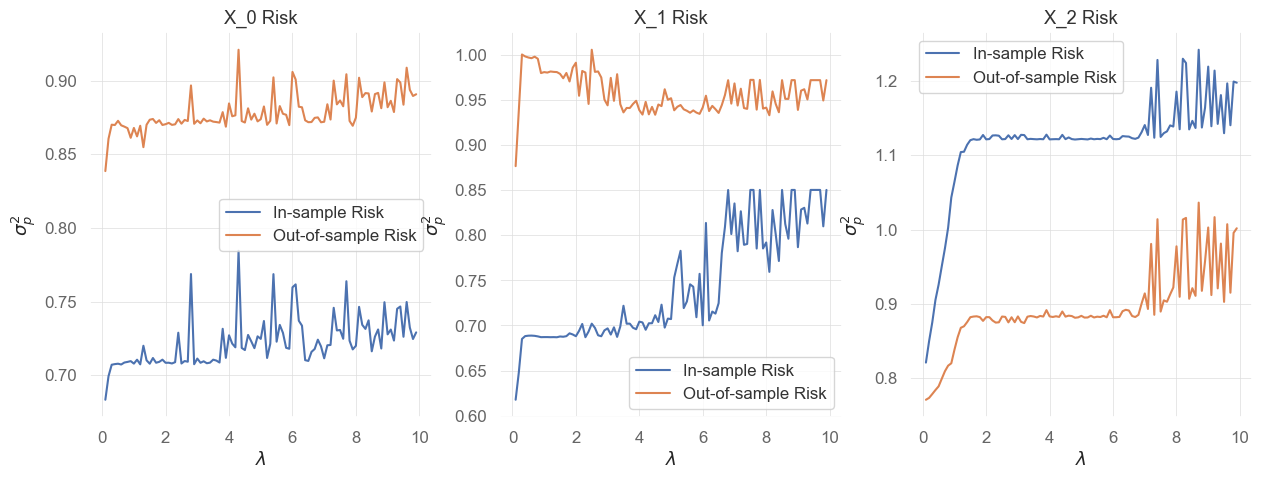

In [133]:
def lasso_portfolio_variance(weights, lambda_, p):
    return weights.T @ (cov_matrix + lambda_ * np.sum(abs(weights))) @ weights

min_var_lambdas = {}
x_test_weights = {}
lambdas = np.arange(0.1,10,0.1)
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    cov_matrix = np.cov(X_train, rowvar=False)

    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    for lambda_ in lambdas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(lasso_portfolio_variance, initial_weights, args=(lambda_, p), method='SLSQP', constraints=constraints) # bounds=bounds
        optimal_weights = result.x

        weights.append(optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights[f'X_test_{i}'] = weights[np.argmin(out_of_sample_risk)]
    min_var_lambdas[f'X_train_{i}'] = lambdas[np.argmin(out_of_sample_risk)]
    
    ax[i].plot(lambdas, in_sample_risk, label='In-sample Risk')
    ax[i].plot(lambdas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[i].set_title(f'X_{i} Risk')
    ax[i].set_xlabel(r'$\lambda$')
    ax[i].set_ylabel(r'$\sigma^2_p$')
    ax[i].legend(loc=0)

print(f'Optimal lambda for each X_train: {min_var_lambdas}')

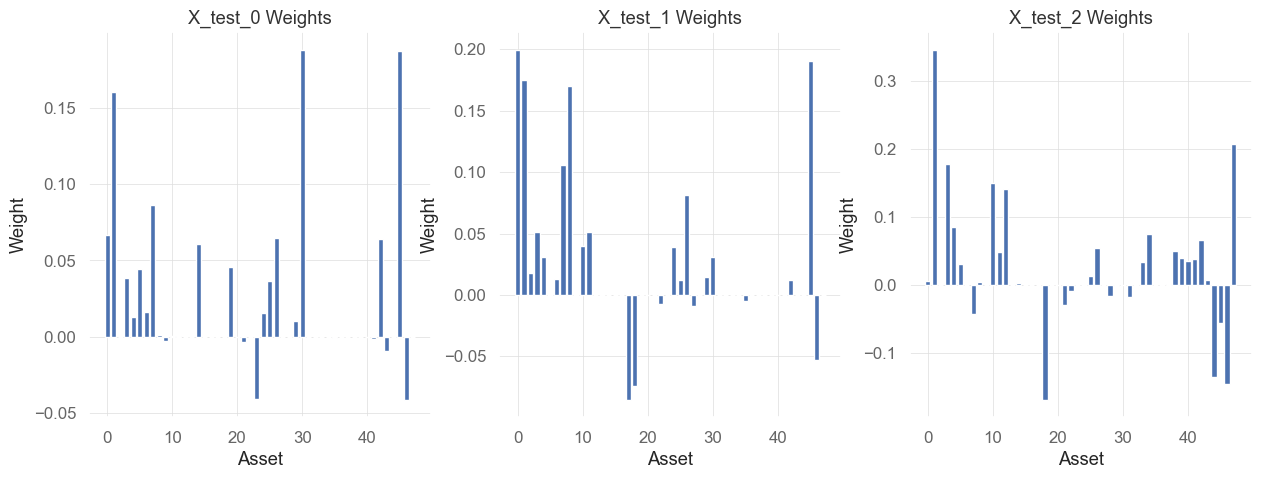

In [134]:
# plot a bar chart of weights for each X_test
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i in range(3):
    ax[i].bar(np.arange(p), x_test_weights[f'X_test_{i}'])
    ax[i].set_title(f'X_test_{i} Weights')
    ax[i].set_xlabel('Asset')
    ax[i].set_ylabel('Weight')

In [135]:
# Taking average of each sample as best regularisation
lasso_lambda_ = np.mean(list(min_var_lambdas.values()))
lasso_lambda_

0.10000000000000002

## Elastic-Net Regularisation
Since Lasso and ridge now calculated, optimise the gamma parameter with the lambdas from above to find best net-elastic

Optimal Gamma for each X_train: {'X_train_0': 0.1, 'X_train_1': 0.1, 'X_train_2': 0.1}


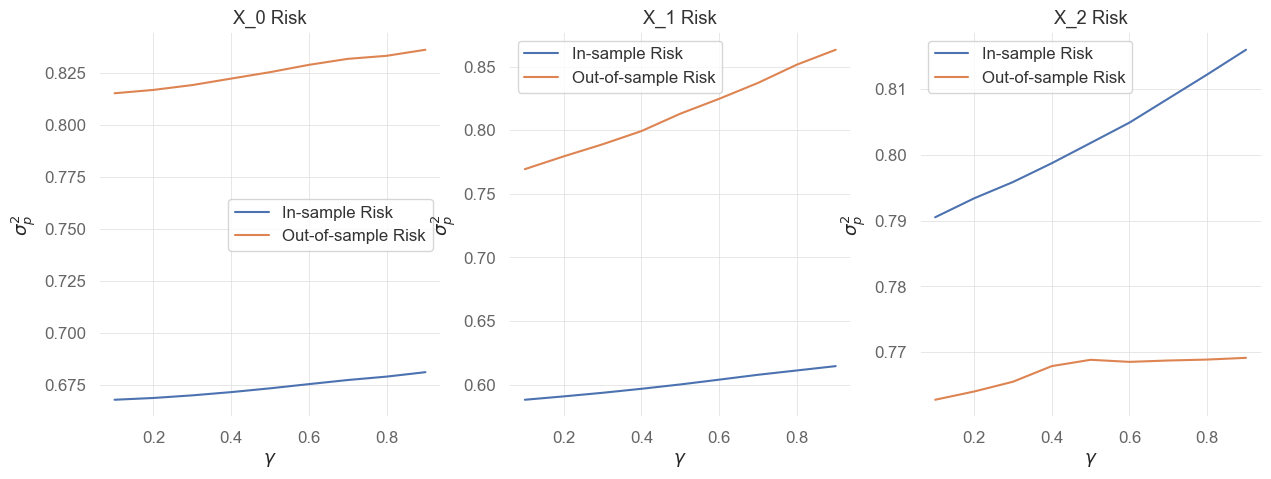

In [139]:
def en_portfolio_variance(weights, gamma, p):
    return gamma * (weights.T @ (cov_matrix + lasso_lambda_ * np.sum(abs(weights))) @ weights) + (1-gamma)*(weights.T @ (cov_matrix + ridge_lambda_ * np.eye(p)) @ weights)

min_var_gammas = {}
x_test_weights = {}
gammas = np.arange(0.1,1,0.1)
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    cov_matrix = np.cov(X_train, rowvar=False)

    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    for gamma in gammas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(en_portfolio_variance, initial_weights, args=(gamma, p), method='SLSQP', constraints=constraints) # bounds=bounds
        optimal_weights = result.x

        weights.append(optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights[f'X_test_{i}'] = weights[np.argmin(out_of_sample_risk)]
    min_var_gammas[f'X_train_{i}'] = gammas[np.argmin(out_of_sample_risk)]
    
    ax[i].plot(gammas, in_sample_risk, label='In-sample Risk')
    ax[i].plot(gammas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[i].set_title(f'X_{i} Risk')
    ax[i].set_xlabel(r'$\gamma$')
    ax[i].set_ylabel(r'$\sigma^2_p$')
    ax[i].legend(loc=0)

print(f'Optimal Gamma for each X_train: {min_var_gammas}')
# x_train 1 and 3 = ridge, x_train 0 and 2 ~~ lasso

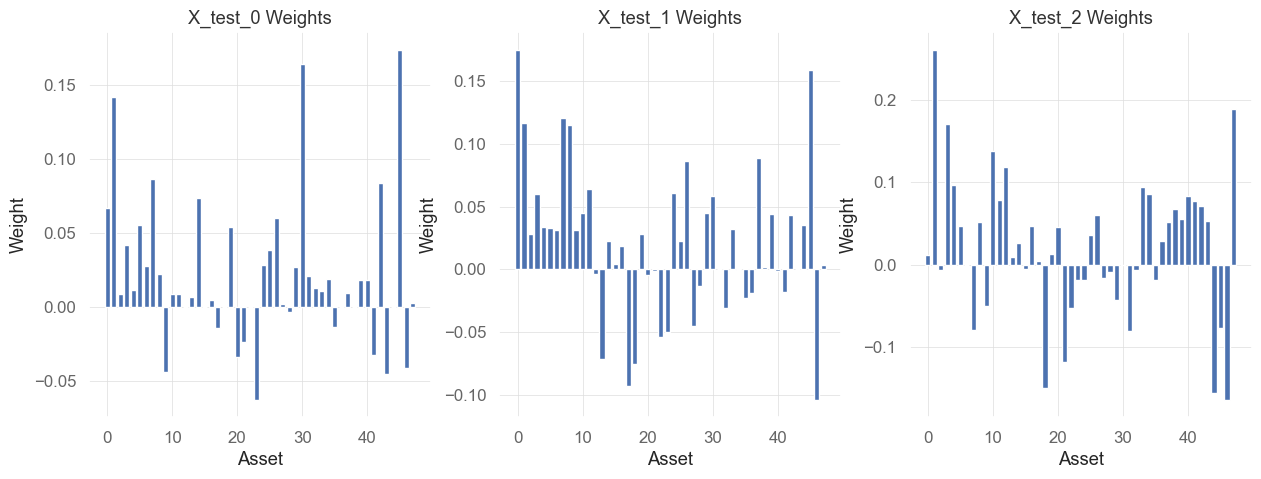

In [140]:
# plot a bar chart of weights for each X_test
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i in range(3):
    ax[i].bar(np.arange(p), x_test_weights[f'X_test_{i}'])
    ax[i].set_title(f'X_test_{i} Weights')
    ax[i].set_xlabel('Asset')
    ax[i].set_ylabel('Weight')

In [141]:
# Taking average of each sample as best regularisation
net_gamma_ = np.mean(list(min_var_gammas.values()))
net_gamma_

0.10000000000000002

### Out-of-sample: Train (March 2010 - Dec 2013), Test (Jan 2014 - Dec 2015)

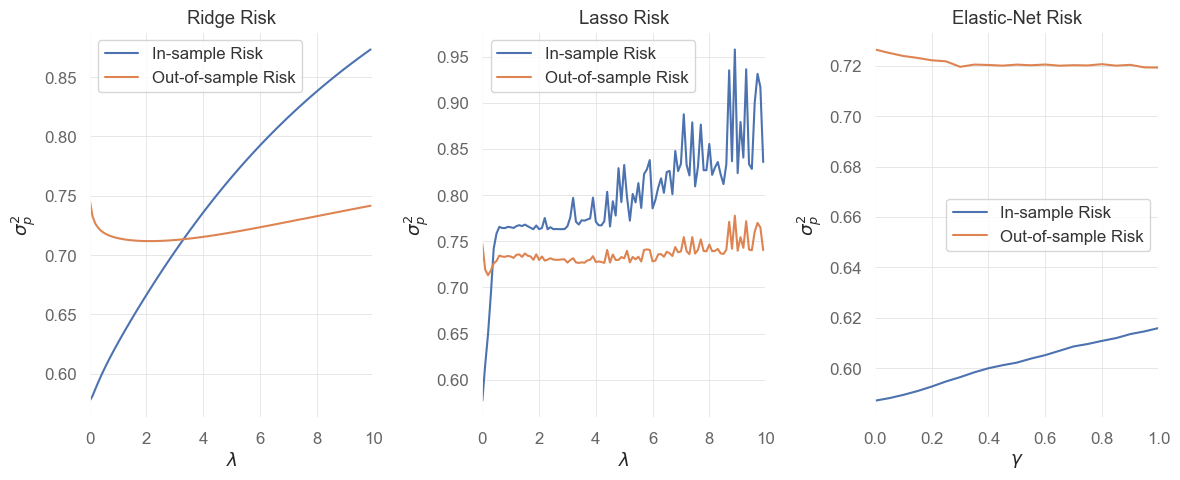

In [142]:
X_trains = [X.iloc[int(len(X)*0.92):int(len(X)*0.96)]] 
X_tests = [X.iloc[int(len(X)*0.96):int(len(X)*0.98)]]

p = X_trains[0].shape[1]
lambdas = np.arange(0,10,0.1)
min_var_lambdas = {'ridge': [], 'lasso': [], 'elastic-net': []}
x_test_weights = {'ridge': [], 'lasso': [], 'elastic-net': []}
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    cov_matrix = np.cov(X_train, rowvar=False)

    # ridge
    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    for lambda_ in lambdas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(ridge_portfolio_variance, initial_weights, args=(lambda_, p), method='SLSQP', constraints=constraints) 
        optimal_weights = result.x

        weights.append(optimal_weights)
        # in_sample_risk.append(optimal_weights.T @ cov_matrix @ optimal_weights)
        # out_of_sample_risk.append(optimal_weights.T @ np.cov(X_test, rowvar=False) @ optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights['ridge'] = weights[np.argmin(out_of_sample_risk)]
    min_var_lambdas['ridge'] = lambdas[np.argmin(out_of_sample_risk)]
    
    ax[0].plot(lambdas, in_sample_risk, label='In-sample Risk')
    ax[0].plot(lambdas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[0].set_title(f'Ridge Risk')
    ax[0].set_xlabel(r'$\lambda$')
    ax[0].set_ylabel(r'$\sigma^2_p$')
    ax[0].set_xlim(0,10)
    ax[0].legend(loc=0)
                
    # lasso
    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    for lambda_ in lambdas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(lasso_portfolio_variance, initial_weights, args=(lambda_, p), method='SLSQP', constraints=constraints) 
        optimal_weights = result.x

        weights.append(optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights['lasso'] = weights[np.argmin(out_of_sample_risk)]
    min_var_lambdas['lasso'] = lambdas[np.argmin(out_of_sample_risk)]
    
    ax[1].plot(lambdas, in_sample_risk, label='In-sample Risk')
    ax[1].plot(lambdas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[1].set_title(f'Lasso Risk')
    ax[1].set_xlabel(r'$\lambda$')
    ax[1].set_ylabel(r'$\sigma^2_p$')
    ax[1].set_xlim(0,10)
    ax[1].legend(loc=0)

    # elastic-net
    weights=[]
    in_sample_risk = []
    out_of_sample_risk = []
    gammas = np.arange(0,1.05,0.05)
    for gamma in gammas:

        initial_weights = np.array(p * [1. / p,])
        result = minimize(en_portfolio_variance, initial_weights, args=(gamma, p), method='SLSQP', constraints=constraints)
        optimal_weights = result.x

        weights.append(optimal_weights)
        in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
        out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    x_test_weights['elastic-net'] = weights[np.argmin(out_of_sample_risk)]
    min_var_gammas['elastic-net'] = gammas[np.argmin(out_of_sample_risk)]

    ax[2].plot(gammas, in_sample_risk, label='In-sample Risk')
    ax[2].plot(gammas, out_of_sample_risk, label='Out-of-sample Risk')
    ax[2].set_title(f'Elastic-Net Risk')
    ax[2].set_xlabel(r'$\gamma$')
    ax[2].set_ylabel(r'$\sigma^2_p$')
    ax[2].set_xlim(0,1)
    ax[2].legend(loc=0)

plt.tight_layout()
plt.savefig('Photos/Task2/ridge_lasso_reg.png', dpi=600)

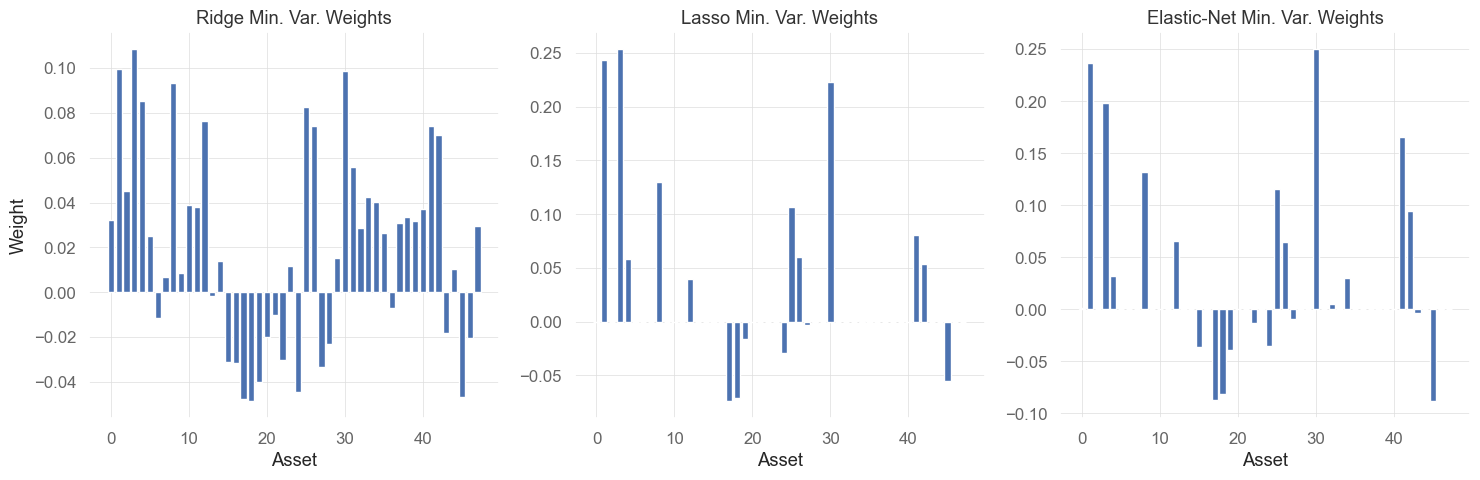

In [143]:
# weights
# plot a bar chart of weights for each X_test
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.arange(p), x_test_weights['ridge'])
ax[0].set_title(f'Ridge Min. Var. Weights')
ax[0].set_xlabel('Asset')
ax[0].set_ylabel('Weight')

ax[1].bar(np.arange(p), x_test_weights['lasso'])
ax[1].set_title(f'Lasso Min. Var. Weights')
ax[1].set_xlabel('Asset')

ax[2].bar(np.arange(p), x_test_weights['elastic-net'])
ax[2].set_title(f'Elastic-Net Min. Var. Weights')
ax[2].set_xlabel('Asset')

plt.tight_layout()
plt.savefig('Photos/Task2/regs_weights.png', dpi=600)

## 3. Finally, discuss what happens if you introduce a ban on short selling to the un-regularized problem.

### No short selling:

In [37]:
from scipy.optimize import minimize

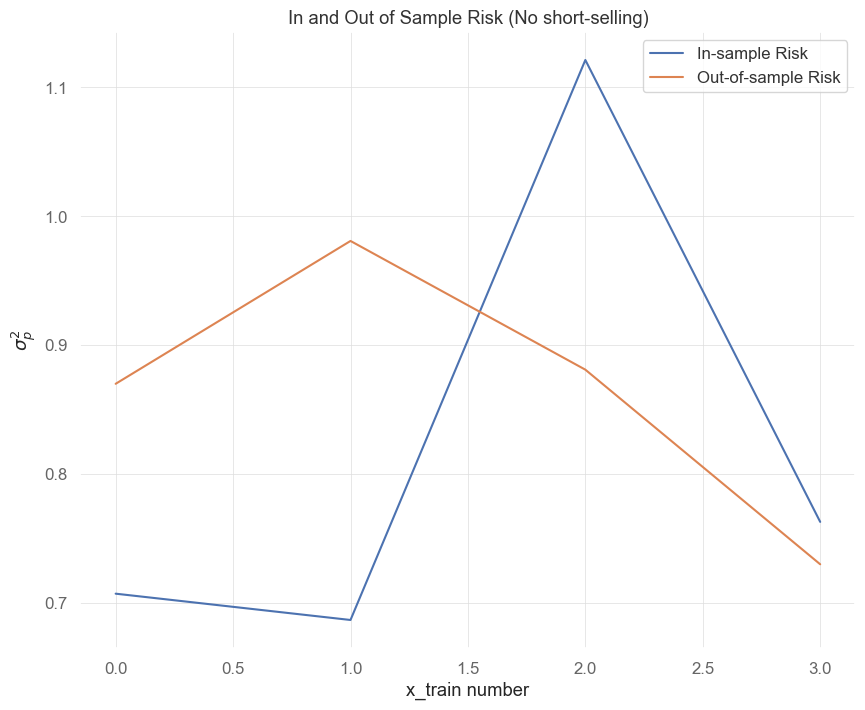

In [55]:
def portfolio_variance(weights):
    return weights.T @ cov_matrix @ weights


X_trains = [X.iloc[int(len(X)*0.80):int(len(X)*0.84)], X.iloc[int(len(X)*0.84):int(len(X)*0.88)], X.iloc[int(len(X)*0.88):int(len(X)*0.92)], X.iloc[int(len(X)*0.92):int(len(X)*0.96)]] #2005-10, 2010-2015
X_tests = [X.iloc[int(len(X)*0.84):int(len(X)*0.86)], X.iloc[int(len(X)*0.88):int(len(X)*0.90)], X.iloc[int(len(X)*0.92):int(len(X)*0.94)], X.iloc[int(len(X)*0.96):int(len(X)*0.98)]]

p = X_trains[0].shape[1]  # Ensure this is defined before using it to set bounds
bounds = tuple((0, 1) for _ in range(p))  # no short-selling

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

x_test_weights = {}
in_sample_risk = []
out_of_sample_risk = []

for i, (X_train, X_test) in enumerate(zip(X_trains, X_tests)):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    cov_matrix = np.cov(X_train, rowvar=False)

    initial_weights = np.array(p * [1. / p,])
    result = minimize(portfolio_variance, initial_weights, method='SLSQP', constraints=constraints, bounds=bounds)
    optimal_weights = result.x
    
    in_sample_risk.append(np.std(np.dot(optimal_weights, X_train.T)))
    out_of_sample_risk.append(np.std(np.dot(optimal_weights, X_test.T)))
    
    # Correctly reference 'optimal_weights' instead of 'weights'
    x_test_weights[f'X_test_{i}'] = optimal_weights #[np.argmin(out_of_sample_risk)]

plt.figure(figsize=(10, 8))    
plt.plot(range(len(in_sample_risk)), in_sample_risk, label='In-sample Risk')
plt.plot(range(len(out_of_sample_risk)), out_of_sample_risk, label='Out-of-sample Risk')
plt.title('In and Out of Sample Risk (No short-selling)')
plt.xlabel('x_train number')
plt.ylabel(r'$\sigma^2_p$')
plt.legend()
plt.show()

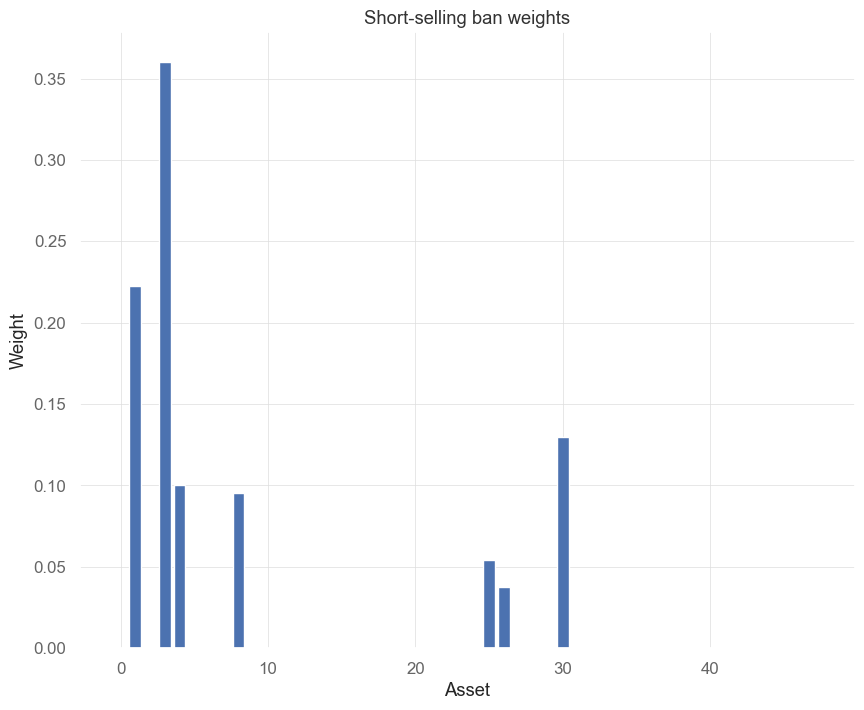

In [58]:
# plot a bar chart of weights for each X_test
# fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
# for i in range(4):
#     ax[i//2,i%2].bar(np.arange(p), x_test_weights[f'X_test_{i}'])
#     ax[i//2,i%2].set_title(f'X_test_{i} Weights')
#     ax[i//2,i%2].set_xlabel('Asset')
#     ax[i//2,i%2].set_ylabel('Weight')

fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
ax.bar(np.arange(p), x_test_weights[f'X_test_{3}'])
ax.set_title(f'Short-selling ban weights')
ax.set_xlabel('Asset')
ax.set_ylabel('Weight')
plt.savefig('shortsell_weights.png', dpi=600)

## Build momentum portfolio EW vs Optimisation

In [40]:
def calculate_momentum_difference(returns_frame, roll_periods=[5,21,252], rebalance_period='W'):

    rolling_weekly_returns = returns_frame.rolling(roll_periods[0]).apply(lambda x: (1+x).prod() - 1).dropna()
    rolling_monthly_returns = returns_frame.rolling(roll_periods[1]).apply(lambda x: (1+x).prod() - 1).dropna()
    rolling_annually_returns = returns_frame.rolling(roll_periods[2]).apply(lambda x: (1+x).prod() - 1).dropna()

    # Align the dataframes
    returns_frame = returns_frame.loc[rolling_annually_returns.index[0]:rolling_annually_returns.index[-1],:]
    rolling_weekly_returns = rolling_weekly_returns.loc[rolling_annually_returns.index[0]:rolling_annually_returns.index[-1],:]
    rolling_monthly_returns = rolling_monthly_returns.loc[rolling_annually_returns.index[0]:rolling_annually_returns.index[-1],:]

    # resample all data to weekly
    rolling_weekly_returns = pd.DataFrame(rolling_weekly_returns.resample(rebalance_period).last().dropna())
    rolling_monthly_returns = pd.DataFrame(rolling_monthly_returns.resample(rebalance_period).last().dropna())
    rolling_annually_returns = pd.DataFrame(rolling_annually_returns.resample(rebalance_period).last().dropna())

    signal_dataframe = pd.DataFrame(((1+rolling_annually_returns)/(1+rolling_monthly_returns)).shift(1).fillna(0))

    return signal_dataframe, returns_frame, rolling_weekly_returns, rolling_monthly_returns, rolling_annually_returns


def rank_momentum_signal(signal_dict, returns_dict, ls_percentile = 0.1):
    signal_dict.fillna(0, inplace=True)
    rank = signal_dict.rank(axis=1, method='first', ascending=False) 
    num_assets = len(signal_dict.columns)
    
    toggle = int(ls_percentile * num_assets)
    top_perc = toggle
    bottom_perc = num_assets - toggle

    num_securities_held = 2*toggle
    ranked_toggle = np.where(rank < top_perc, 1, np.where(rank > bottom_perc, -1, 0))
    momentum_selection = returns_dict * ranked_toggle
        
    return ranked_toggle, num_securities_held, momentum_selection, rank


def equal_weight_portfolio(portfolio_selections, securities_per_sector):
    portfolio = ((1+portfolio_selections).prod(axis=1)-1) / securities_per_sector
    return portfolio


def add_transaction_costs(dataframe, target_costs = 0.03):

    dataframe = dataframe - (pow(1+target_costs, 1/50)-1)

    return dataframe

### 1. Equal Weight

In [41]:
rebalance_period = 'W'
daily_returns = ew_df.loc['2000-01-01':,:] / 100 # since 200, /100 to convert to %
daily_returns.index = pd.to_datetime(daily_returns.index)

signal_dataframe, _, weekly_returns, monthly_returns, ann_returns = calculate_momentum_difference(daily_returns) #signal is only shifted dataframe
_, num_securities_held, momentum_selection, _ = rank_momentum_signal(signal_dataframe, weekly_returns, ls_percentile = 0.2)
portfolio = equal_weight_portfolio(momentum_selection, num_securities_held)
cum_return_ew = pd.DataFrame((1+portfolio).cumprod(), columns=['Portfolio'])

### 2. Minimum Variance Portfolio

In [42]:
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

selected_postitions = momentum_selection.apply(lambda x: x.index[x != 0].tolist(), axis=1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

covariances = {}
cov_calc_period = 24
temp = pd.DataFrame(ew_df.loc['2000-01-01':,:])
# recalc cov matrix every X weeks
for i in range(len(selected_postitions)-cov_calc_period):
    cov_matrix = temp.loc[:,selected_postitions[i+cov_calc_period]].cov().to_numpy()
    covariances[f'Rebalance_{i}'] = cov_matrix

p = len(covariances[f'Rebalance_0'])
weights = {}
for i in range(len(covariances)):
    # bounds = tuple((-1, 1) for _ in range(p))
    initial_weights = np.array(p * [1./p,])
    result = minimize(portfolio_variance, initial_weights, args=(covariances[f'Rebalance_{i}']), 
                      method='SLSQP', constraints=constraints) #bounds=bounds
    optimal_weights = result.x

    weights[f'Rebalance_{i}'] = optimal_weights

mv_noreg_portfolio = pd.DataFrame(columns=['NoReg_Portfolio'], index=selected_postitions.index)
iter = 0
for i in range(cov_calc_period,weekly_returns.shape[0]):
    returns = momentum_selection[selected_postitions[iter]].iloc[iter+cov_calc_period].values
    allocation = returns * weights[f'Rebalance_{iter}']
    mv_noreg_portfolio['NoReg_Portfolio'][i] = np.cumprod((1+(allocation)))[-1]-1
    iter += 1
mv_noreg_portfolio.dropna(inplace=True)

### 3. MVO with Ridge Regularisation - using optimal lambda from sample period above

In [44]:
net_gamma_ = 0.1
lasso_lambda_ = 0.1
ridge_lambda_ = 0.2

In [45]:
def portfolio_variance(weights, cov_matrix, lambda_, p):
    return weights.T @ (cov_matrix + lambda_ * np.eye(p)) @ weights
        
selected_postitions = momentum_selection.apply(lambda x: x.index[x != 0].tolist(), axis=1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

covariances = {}
cov_calc_period = 24
temp = pd.DataFrame(ew_df.loc['2000-01-01':,:])
# recalc cov matrix every X weeks
for i in range(len(selected_postitions)-cov_calc_period):
    cov_matrix = temp.loc[:,selected_postitions[i+cov_calc_period]].cov().to_numpy()
    covariances[f'Rebalance_{i}'] = cov_matrix

p = len(covariances[f'Rebalance_0'])
weights = {}
for i in range(len(covariances)):
    # bounds = tuple((-1, 1) for _ in range(p))
    initial_weights = np.array(p * [1./p,])
    result = minimize(portfolio_variance, initial_weights, args=(covariances[f'Rebalance_{i}'],ridge_lambda_, p), 
                      method='SLSQP', constraints=constraints) # bounds=bounds
    optimal_weights = result.x

    weights[f'Rebalance_{i}'] = optimal_weights

mv_ridge_portfolio = pd.DataFrame(columns=['Ridge_Portfolio'], index=selected_postitions.index)
iter = 0
for i in range(cov_calc_period,weekly_returns.shape[0]):
    returns = momentum_selection[selected_postitions[iter]].iloc[iter+cov_calc_period].values
    allocation = returns * weights[f'Rebalance_{iter}']
    mv_ridge_portfolio['Ridge_Portfolio'][i] = np.cumprod((1+(allocation)))[-1]-1
    iter += 1

mv_ridge_portfolio.dropna(inplace=True)

### 4. MVO with Lasso Regularisation

In [46]:
def portfolio_variance(weights, cov_matrix, lambda_, p):
    return weights.T @ (cov_matrix + lambda_ * np.sum(abs(weights))) @ weights
        
selected_postitions = momentum_selection.apply(lambda x: x.index[x != 0].tolist(), axis=1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

covariances = {}
cov_calc_period = 24
temp = pd.DataFrame(ew_df.loc['2000-01-01':,:])
# recalc cov matrix every X weeks
for i in range(len(selected_postitions)-cov_calc_period):
    cov_matrix = temp.loc[:,selected_postitions[i+cov_calc_period]].cov().to_numpy()
    covariances[f'Rebalance_{i}'] = cov_matrix

p = len(covariances[f'Rebalance_0'])
weights = {}
for i in range(len(covariances)):
    # bounds = tuple((-1, 1) for _ in range(p))
    initial_weights = np.array(p * [1./p,])
    result = minimize(portfolio_variance, initial_weights, args=(covariances[f'Rebalance_{i}'],lasso_lambda_, p), 
                      method='SLSQP', constraints=constraints) # bounds=bounds
    optimal_weights = result.x

    weights[f'Rebalance_{i}'] = optimal_weights

mv_lasso_portfolio = pd.DataFrame(columns=['Lasso_Portfolio'], index=selected_postitions.index)
iter = 0
for i in range(cov_calc_period,weekly_returns.shape[0]):
    returns = momentum_selection[selected_postitions[iter]].iloc[iter+cov_calc_period].values
    allocation = returns * weights[f'Rebalance_{iter}']
    mv_lasso_portfolio['Lasso_Portfolio'][i] = np.cumprod((1+(allocation)))[-1]-1
    iter += 1

mv_lasso_portfolio.dropna(inplace=True)

### 5. MVO with Net-Elastic Regularisation

In [47]:
def portfolio_variance(weights, cov_matrix, gamma, p):
    return gamma * (weights.T @ (cov_matrix + lasso_lambda_ * np.sum(abs(weights))) @ weights) + (1-gamma)*(weights.T @ (cov_matrix + ridge_lambda_ * np.eye(p)) @ weights)

        
selected_postitions = momentum_selection.apply(lambda x: x.index[x != 0].tolist(), axis=1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

covariances = {}
cov_calc_period = 24
temp = pd.DataFrame(ew_df.loc['2000-01-01':,:])
# recalc cov matrix every X weeks
for i in range(len(selected_postitions)-cov_calc_period):
    cov_matrix = temp.loc[:,selected_postitions[i+cov_calc_period]].cov().to_numpy()
    covariances[f'Rebalance_{i}'] = cov_matrix

p = len(covariances[f'Rebalance_0'])
weights = {}
for i in range(len(covariances)):
    # bounds = tuple((-1, 1) for _ in range(p))
    initial_weights = np.array(p * [1./p,])
    result = minimize(portfolio_variance, initial_weights, args=(covariances[f'Rebalance_{i}'],net_gamma_, p), 
                      method='SLSQP', constraints=constraints) # bounds=bounds
    optimal_weights = result.x

    weights[f'Rebalance_{i}'] = optimal_weights

mv_netEL_portfolio = pd.DataFrame(columns=['EL_Portfolio'], index=selected_postitions.index)
iter = 0
for i in range(cov_calc_period,weekly_returns.shape[0]):
    returns = momentum_selection[selected_postitions[iter]].iloc[iter+cov_calc_period].values
    allocation = returns * weights[f'Rebalance_{iter}']
    mv_netEL_portfolio['EL_Portfolio'][i] = np.cumprod((1+(allocation)))[-1]-1
    iter += 1

mv_netEL_portfolio.dropna(inplace=True)

## Applying Covariance Shrinkage and rerunning the portfolios to see the performance out of sample

Mean-variance optimisation with no regularisation works best so will shrink this and see out of sample vs other approach

Honey I shrunk the covariance matrix:
- Due to instability in estimating the covariance matrix over time, I apply shrinkage to the covariance matrix and run this for the equal weight portfolio vs optimisiation approaches to find the best portfolio performer using 1/n vs optimisation

In [48]:
from sklearn.covariance import ShrunkCovariance
shrink_factor = np.arange(0,1,0.1)
cov = np.cov(X_train, rowvar=False)
cov_shrink = []
for shrink in shrink_factor:
    shrunk_cov = ShrunkCovariance(shrinkage=shrink).fit(X_train)
    cov_shrink.append(shrunk_cov.covariance_)

In [49]:
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

selected_postitions = momentum_selection.apply(lambda x: x.index[x != 0].tolist(), axis=1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})


shrink_factor = np.arange(0.2, 1.1, 0.2)
covariances = {}
weights = {}
portfolios = pd.DataFrame()
cov_calc_period = 24
temp = pd.DataFrame(ew_df.loc['2000-01-01':,:])
for shrink in shrink_factor:
    # recalc cov matrix every X weeks
    for i in range(len(selected_postitions)-cov_calc_period):
        returns = temp.loc[:,selected_postitions[i+cov_calc_period]].to_numpy()
        shrunk_cov = ShrunkCovariance(shrinkage=shrink).fit(returns)
        covariances[f'Rebalance_{i}'] = shrunk_cov.covariance_

    p = len(covariances[f'Rebalance_0'])
    for i in range(len(covariances)):
        # bounds = tuple((-1, 1) for _ in range(p))
        initial_weights = np.array(p * [1./p,])
        result = minimize(portfolio_variance, initial_weights, args=(covariances[f'Rebalance_{i}']), 
                        method='SLSQP', constraints=constraints) #bounds=bounds
        optimal_weights = result.x

        weights[f'Rebalance_{i}'] = optimal_weights


    mv_noreg_portfolio = pd.DataFrame(columns=['NoReg_Portfolio'], index=selected_postitions.index)
    iter = 0
    for i in range(cov_calc_period,weekly_returns.shape[0]):
        returns = momentum_selection[selected_postitions[iter]].iloc[iter+cov_calc_period].values
        allocation = returns * weights[f'Rebalance_{iter}']
        mv_noreg_portfolio['NoReg_Portfolio'][i] = np.cumprod((1+(allocation)))[-1]-1
        iter += 1
    mv_noreg_portfolio.dropna(inplace=True)
    portfolios[f'Shrink_{shrink}_portfolio'] = mv_noreg_portfolio

Portfolio Shrinkage factor Shrink_0.2_portfolio: 2.913720253311073
Portfolio Shrinkage factor Shrink_0.4_portfolio: 2.2817174729772125
Portfolio Shrinkage factor Shrink_0.6000000000000001_portfolio: 1.8321158020842927
Portfolio Shrinkage factor Shrink_0.8_portfolio: 1.47126703792161
Portfolio Shrinkage factor Shrink_1.0_portfolio: 1.1418310743999178


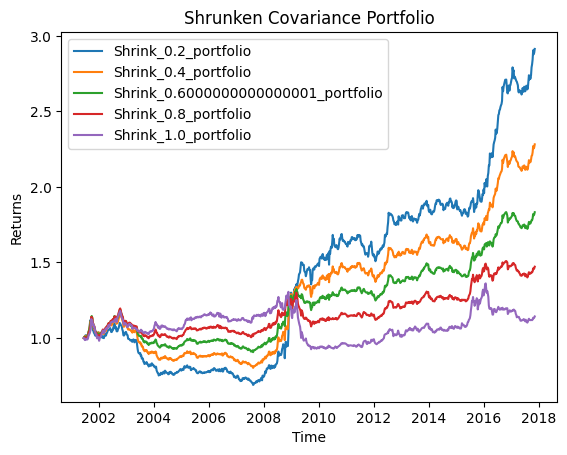

In [50]:
for portfolio in portfolios:
    plt.plot((1+portfolios[portfolio]).cumprod(), label=portfolio)
    print(f'Portfolio Shrinkage factor {portfolio}: {(1+portfolios[portfolio]).cumprod()[-1]}')
plt.title('Shrunken Covariance Portfolio')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

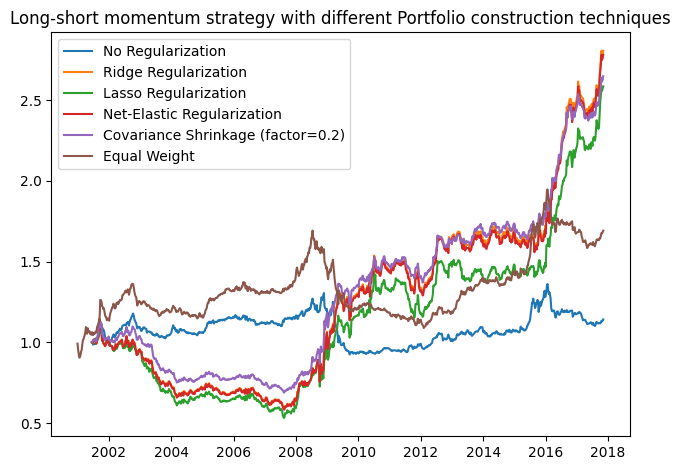

In [51]:
mv_noreg_strategy = (1+mv_noreg_portfolio.clip(-1,0.1)).cumprod()
mv_ridge_strategy = (1+mv_ridge_portfolio.clip(-1,0.1)).cumprod()
mv_lasso_strategy = (1+mv_lasso_portfolio.clip(-1,0.1)).cumprod()
mv_netEL_strategy = (1+mv_netEL_portfolio.clip(-1,0.1)).cumprod()
mv_shrunk_strategy = (1+portfolios['Shrink_0.2_portfolio'].clip(-1,0.1)).cumprod()

plt.plot((mv_noreg_strategy), label='No Regularization')
plt.plot((mv_ridge_strategy), label='Ridge Regularization')
plt.plot((mv_lasso_strategy), label='Lasso Regularization')
plt.plot((mv_netEL_strategy), label='Net-Elastic Regularization')
plt.plot((mv_shrunk_strategy), label='Covariance Shrinkage (factor=0.2)')
plt.plot(cum_return_ew, label='Equal Weight')
plt.legend()
plt.title('Long-short momentum strategy with different Portfolio construction techniques')
plt.tight_layout()
plt.savefig('Photos/Task2/strategies.png', dpi=600)

In [1]:
import quantstats as qs
df = cum_return_ew.join([mv_noreg_strategy, mv_ridge_strategy, mv_lasso_strategy, mv_netEL_strategy, mv_shrunk_strategy]).dropna()
qs.reports.full(df, mode='full')

## Efficient Frontier for equal weight vs best regularisor performance

In [ ]:
# Portfolio weights
returns = temp.to_numpy()
shrunk_cov = ShrunkCovariance(shrinkage=1).fit(returns)
cov = shrunk_cov.covariance_
invC = np.linalg.inv(cov)  # inverse to find density function
z = np.sum(np.sum(invC, axis=1), axis=0) 
w = (np.sum(invC, axis=1)/z).T

portfolio_var = w @ invC @ w
portfolio_vol = np.sqrt(portfolio_var)

In [ ]:
port_returns = []
port_vol = []
port_weights = []

indiv_returns = ((1 + (temp/100)).resample('Y').prod() - 1).values
num_assets = len(temp.columns)
num_portfolios = 10000
for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_weights.append(weights)

    returns = np.dot(weights.reshape(1,-1), indiv_returns.T.mean(axis=1))[0]
    port_returns.append(returns)

    var = (weights.T @ cov @ weights).sum().sum()
    sd = np.sqrt(var)
    port_vol.append(sd)

portfolio = {'Returns': port_returns, 'Volatility': port_vol}
for counter, symbol in enumerate(temp.columns.tolist()):
    portfolio[symbol+' weight'] = [w[counter] for w in port_weights]

df = pd.DataFrame(portfolio)
df.head()

,Returns,Volatility,Agric weight,Food weight,Soda weight,Beer weight,Smoke weight,Toys weight,Fun weight,Books weight,...,Boxes weight,Trans weight,Whlsl weight,Rtail weight,Meals weight,Banks weight,Insur weight,RlEst weight,Fin weight,Other weight
0,0.206217,0.268956,0.040351,0.004349,0.001841,0.020653,0.041152,0.003643,0.028538,0.021294,...,0.027942,0.014982,0.014375,0.020478,0.006640,0.041125,0.023593,0.036623,0.020366,0.003682
1,0.208851,0.270236,0.035026,0.021200,0.027664,0.039542,0.027874,0.013700,0.011093,0.025415,...,0.023291,0.011306,0.001097,0.036055,0.043453,0.041976,0.007809,0.030217,0.014114,0.003297
2,0.207965,0.256772,0.012532,0.040537,0.034384,0.012127,0.010067,0.011322,0.011963,0.026099,...,0.033487,0.035490,0.040034,0.022658,0.000336,0.000103,0.016903,0.028430,0.017288,0.019231
3,0.211986,0.258428,0.017620,0.010058,0.016897,0.039042,0.011165,0.031626,0.016521,0.025697,...,0.021741,0.038237,0.017069,0.019769,0.001441,0.011103,0.020973,0.015260,0.033974,0.006853
4,0.211531,0.257277,0.025751,0.015090,0.008056,0.032394,0.029757,0.032737,0.036428,0.022518,...,0.017635,0.018823,0.027586,0.025530,0.009373,0.021234,0.030655,0.033200,0.022769,0.031007


In [ ]:
min_vol_port = df.iloc[df.Volatility.idxmin()]

rf = 0.04
sharpe_optimal = df.iloc[((df['Returns'] - rf) / df['Volatility']).idxmax()]
sharpe_optimal.head()

Returns         0.215254
Volatility      0.244962
Agric weight    0.022080
Food  weight    0.017762
Soda  weight    0.006097
Name: 782, dtype: float64

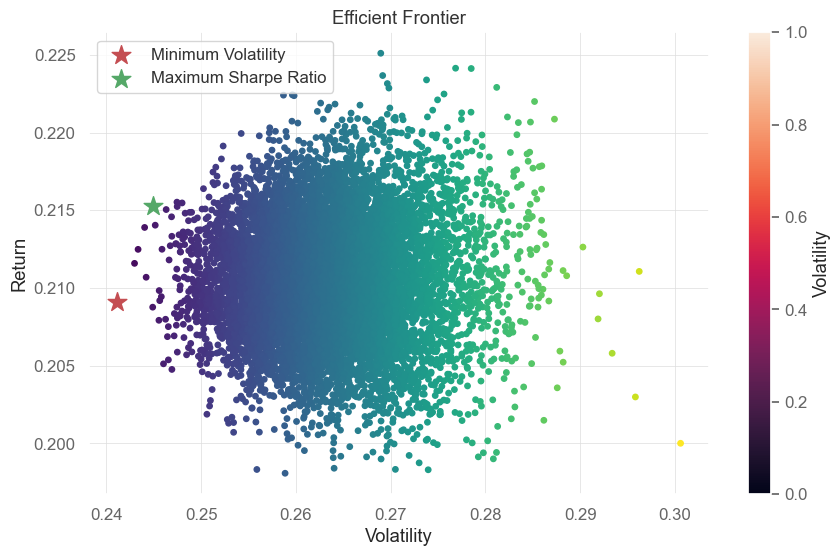

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.Volatility, df.Returns, c=df.Volatility, 
            cmap='viridis',  marker='o', s=15)
plt.scatter(min_vol_port.Volatility, min_vol_port.Returns, color='r', marker='*', s=200, label='Minimum Volatility')
plt.scatter(sharpe_optimal.Volatility, sharpe_optimal.Returns, color='g', marker='*', s=200, label='Maximum Sharpe Ratio')
plt.colorbar(label='Volatility')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend(loc=0)